# TP5 – Compromis Biais/Variance et autre

## I. Chargement et visualisation des données

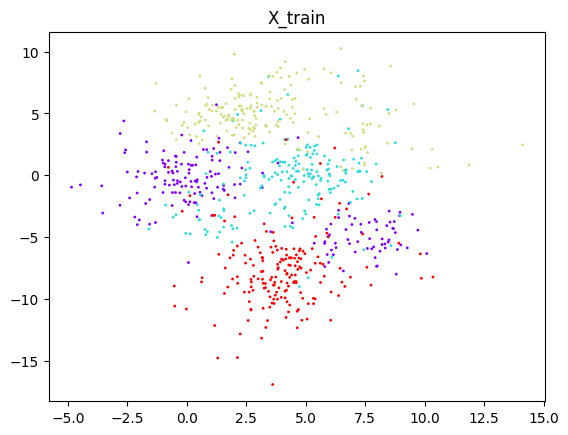

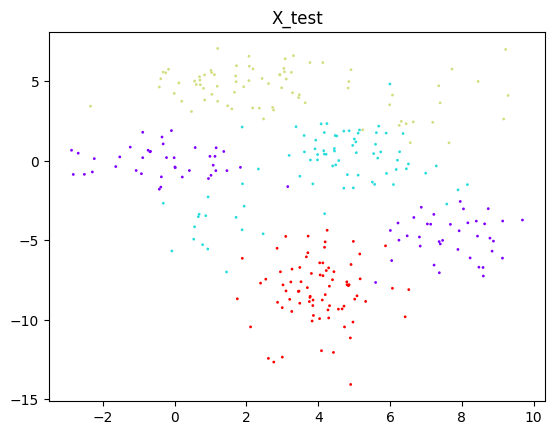

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("TP5.npz")
X_train, y_train, X_test, y_test = (data[key] for key in ["X_train", "y_train", "X_test", "y_test"])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=1, cmap='rainbow');
plt.title("X_train")
plt.show()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=1, cmap='rainbow');
plt.title("X_test")
plt.show()


Questions \
Combien  y a-t-il de points dans la base d’apprentissage ? Dans la base de test ? Quelle est la 
dimension des données ? \
Combien  y  a-t-il  de  classes ?  Est-ce  que  les  classes  sont  bien  équilibrées  dans  la  base 
d’apprentissage et la base de test ?

Il y a 748 points dans la base d'apprentissage
Il y a 312 points dans la base de test
Les donées sont en 2 dimention
Il y a 4 classes


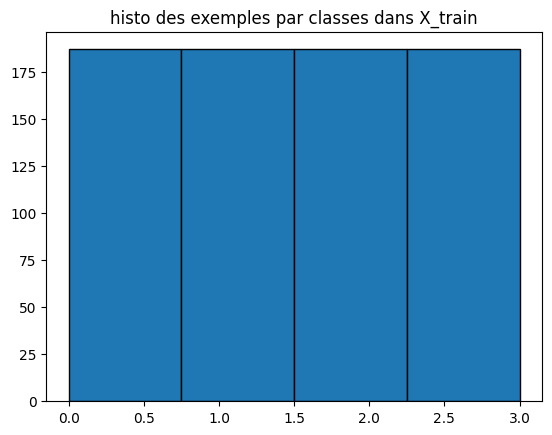

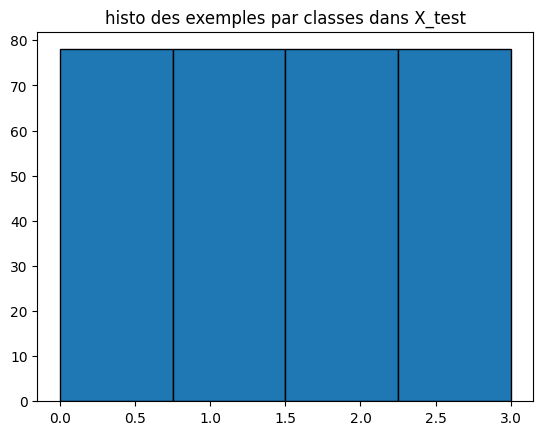

In [23]:
print(f"Il y a {X_train.shape[0]} points dans la base d'apprentissage")
print(f"Il y a {X_test.shape[0]} points dans la base de test")
print(f"Les donées sont en {X_train.shape[1]} dimention")
print(f"Il y a {np.unique(y_train).shape[0]} classes")
plt.hist(y_train,4,ec='black');plt.title("histo des exemples par classes dans X_train"); plt.show()
plt.hist(y_test,4,ec='black');plt.title("histo des exemples par classes dans X_test"); plt.show()

Les classes sont donc bien équilibrées

# II. Calcul du biais et de la variance du classifieur 1PPV

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import mode


In [63]:
scaler = StandardScaler()
#train
scaler.fit(X_train)
print("moyenne : ",scaler.mean_)
print("ecart-type : ",np.sqrt(scaler.var_)) #or scaler.scale_
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

moyenne :  [ 3.58717926 -1.22246526]
ecart-type :  [2.85879137 5.19181556]


In [64]:
y_preds=[]
Nrun = 30
for nrun in range(0,Nrun):
    (X_train_i, _, y_train_i, _) = train_test_split(X_train_scaled,y_train,test_size=0.40,random_state=4+2+5+nrun)
    neigh = KNeighborsClassifier(n_neighbors=1) #default metric : euclidian
    neigh.fit(X_train_i, y_train_i)
    y_preds.append(neigh.predict(X_test_scaled))

modes = mode(y_preds, axis=0)
biais = np.where(modes.mode == y_test, 0, 1)
count = modes.count
variance = 1 - modes.count/len(y_preds)

biais = np.mean(biais)
variance = np.mean(variance)
print(f'Biais moyen = {biais:.2f}, Variance moyenne = {variance:.2f}')

Biais moyen = 0.15, Variance moyenne = 0.08


## III. Etude du compromis biais/variance du classifieur k-PPV

In [ ]:
# évolution du biais et de la variance en fonction du k des k-ppv

